### ***카테고리(아우터, 상의, 하의)별 또는 성별별 어떤 경우에 별점과 리뷰를 안 좋게 주는가?***

**가설 예시**

1.   아우터는 보온성이 좋지 않으면 별점과 리뷰를 좋지 않게 줄 것이다.
2.   카테고리와 상관 없이 예상했던 핏이 아닐 경우에 별점과 리뷰를 좋지 않게 줄 것이다.
3. 하의는 기장이 별점과 리뷰에 영향을 미칠 것이다.
4. 여성은 원했던 색상이 아닐 경우에 별점과 리뷰를 좋지 않게 줄 가능성이 높을 것이다.

**WHY?**
리뷰 분석을 통해 상품 기획 및 개발 시 보완 가능


In [48]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-g4wq2m8i
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-g4wq2m8i


In [50]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from konlpy.tag import Okt  
import nltk
from hanspell import spell_checker

tokenizer = Okt()

In [51]:
df = pd.read_csv('/content/drive/MyDrive/musinsa_reviews.csv')
df.head()

,category,review_type,rating,consumer,consumer rating,brand_name,review
0,상의,낮은 평점,4.9,"남성, 170cm, 90kg",3.0,푸마 셀렉트,조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요
1,상의,낮은 평점,4.9,"남성, 175cm, 69kg",3.0,푸마 셀렉트,무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...
2,상의,낮은 평점,4.9,"남성, 174cm, 75kg",4.0,푸마 셀렉트,후드티라 더 더워지기전에 자주 입을것 같아 만족합니다
3,상의,낮은 평점,4.9,"남성, 170cm, 60kg",4.0,푸마 셀렉트,꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요
4,상의,낮은 평점,4.9,"남성, 178cm, 75kg",4.0,푸마 셀렉트,두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x


In [52]:
# 데이터 결측치 및 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20917 entries, 0 to 20916
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         20917 non-null  object 
 1   review_type      20917 non-null  object 
 2   rating           20917 non-null  float64
 3   consumer         20917 non-null  object 
 4   consumer rating  20917 non-null  float64
 5   brand_name       20917 non-null  object 
 6   review           20917 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


In [53]:
# consumer 컬럼 정보 분리
df['consumer_sex'] = df['consumer'].str.split(',').str[0]
df['consumer_height'] = df['consumer'].str.split(',').str[1]
df['consumer_weight'] = df['consumer'].str.split(',').str[2]
df.head()

,category,review_type,rating,consumer,consumer rating,brand_name,review,consumer_sex,consumer_height,consumer_weight
0,상의,낮은 평점,4.9,"남성, 170cm, 90kg",3.0,푸마 셀렉트,조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요,남성,170cm,90kg
1,상의,낮은 평점,4.9,"남성, 175cm, 69kg",3.0,푸마 셀렉트,무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...,남성,175cm,69kg
2,상의,낮은 평점,4.9,"남성, 174cm, 75kg",4.0,푸마 셀렉트,후드티라 더 더워지기전에 자주 입을것 같아 만족합니다,남성,174cm,75kg
3,상의,낮은 평점,4.9,"남성, 170cm, 60kg",4.0,푸마 셀렉트,꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요,남성,170cm,60kg
4,상의,낮은 평점,4.9,"남성, 178cm, 75kg",4.0,푸마 셀렉트,두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x,남성,178cm,75kg


In [54]:
# consumer 컬럼 drop
df = df.drop('consumer', axis=1)
df.head()

,category,review_type,rating,consumer rating,brand_name,review,consumer_sex,consumer_height,consumer_weight
0,상의,낮은 평점,4.9,3.0,푸마 셀렉트,조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요,남성,170cm,90kg
1,상의,낮은 평점,4.9,3.0,푸마 셀렉트,무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...,남성,175cm,69kg
2,상의,낮은 평점,4.9,4.0,푸마 셀렉트,후드티라 더 더워지기전에 자주 입을것 같아 만족합니다,남성,174cm,75kg
3,상의,낮은 평점,4.9,4.0,푸마 셀렉트,꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요,남성,170cm,60kg
4,상의,낮은 평점,4.9,4.0,푸마 셀렉트,두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x,남성,178cm,75kg


In [55]:
# 성별별 별점 평균 확인
df.groupby(['consumer_sex'], as_index=False)['consumer rating'].mean() # 여성이 더 별점을 후하게 주는 경향 있음

,consumer_sex,consumer rating
0,,4.845070
1,남성,4.162981
2,여성,4.368587


In [56]:
top = df['category'] == '상의'
outer = df['category'] == '아우터'
bottom = df['category'] == '하의'

df_top = df[top]
df_outer = df[outer]
df_bottom = df[bottom]

In [57]:
df_top.head()

,category,review_type,rating,consumer rating,brand_name,review,consumer_sex,consumer_height,consumer_weight
0,상의,낮은 평점,4.9,3.0,푸마 셀렉트,조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요,남성,170cm,90kg
1,상의,낮은 평점,4.9,3.0,푸마 셀렉트,무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...,남성,175cm,69kg
2,상의,낮은 평점,4.9,4.0,푸마 셀렉트,후드티라 더 더워지기전에 자주 입을것 같아 만족합니다,남성,174cm,75kg
3,상의,낮은 평점,4.9,4.0,푸마 셀렉트,꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요,남성,170cm,60kg
4,상의,낮은 평점,4.9,4.0,푸마 셀렉트,두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x,남성,178cm,75kg


In [58]:
print(len(df_top))
print(len(df_outer))
print(len(df_bottom))

6766
7125
7026


In [59]:
review_t = df_top['review']
review_o = df_outer['review']
review_b = df_bottom['review']

In [60]:
review_t

0                          조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요
1       무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...
2                           후드티라 더 더워지기전에 자주 입을것 같아 만족합니다
3             꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요
4                두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x
                              ...                        
6761                      품질이 좋아요\r\n프린트 디자인이 포인트로 넘 예쁘네요
6762               뒤 포인트가 예뻐요.\r\n레깅스나 청바지\r\n다 잘 어울릴듯 해요
6763                      사이즈가 조금 크긴하지만 오버핏으로 입기 좋을거 같습니다
6764                 원단 탄탄하고 오버핏으로 이뻐용 큰거좋아해서 만족합니다 많이파세용
6765    얇고 신축성있는 이런 니트들의 특성상 몸을 타고 흐르는 실루엣이라 같은사이즈의 다른...
Name: review, Length: 6766, dtype: object

In [61]:
sample_t = review_t.sample(frac=0.75, random_state=42)
sample_o = review_o.sample(frac=0.75, random_state=42)
sample_b = review_b.sample(frac=0.75, random_state=42)

In [62]:
sample_t

457                   길이는 엉덩이 조금 못 가리는 정도?고 통이 생각보다 안 넓어요
6476    원단이 두툼하면서 촉감도 부드럽네요.\r\n\r\n색감은 화면보다는 살짝 어두운것 ...
217                    정사이즈로 가면 제 스펙 기준 딱 좋은 오버핏나오는거 같네요!
4314    좋아요\r\n질도 좋고 저렴하고\r\n구멍나면 또 살게요~~~~~\r\n목만 좀더 ...
534     음 배송지연이 계속되서 환불할까햇는데 곰돌이가 귀여워서 계속기다려서 받앗어용 음.....
                              ...                        
5338    너무 귀여워요 .ᐟ.ᐟ uv여서 햇빛닿으면 색 나오고 그늘로 들어가면 색 사라지는게...
1690                     잘받았습니다 퀄리티 좋네요ㅎㅎ앞으로도 자주 착용할거 같아요
5837                      올리브색이 필요했는데 잘 구매한것 같아요! 이쁩니다 ㅎㅎ
1985            디자인은 위에서 아래까지 길이는 만족하지만 팔 길이가 짧아서 조금 아쉽네용
294         깔끔하고 폴로로고가 주는 느낌이 건지나네요 핏은 정핏에서 살짝 오버한 느낌입니다.
Name: review, Length: 5074, dtype: object

In [63]:
# 정규 표현식으로 데이터 정제
sample_t = sample_t.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
sample_o = sample_o.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
sample_b = sample_b.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-63-c821ae0dac47>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_t = sample_t.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-63-c821ae0dac47>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_o = sample_o.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-63-c821ae0dac47>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_b = sample_b.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [64]:
# 토큰화 수행

# 불용어 정의
stopwords=['것','을','요','안','같아요','너무','로','딱','옷','입기','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# Otk
tokenizer = Okt()
tokenized_t =[]
for sentence in sample_t:
    temp = tokenizer.morphs(sentence) # 1. 토큰화
    temp = [word for word in temp if not word in stopwords] # 2. 불용어 제거
    tokenized_t.append(temp)

print(tokenized_t[:10])

[['길이', '엉덩이', '조금', '못', '가리는', '정도', '고', '통', '생각', '보다', '넓어요'], ['원단', '두', '툼', '하면서', '촉감', '부드럽네요', '색감', '화면', '보다는', '살짝', '어', '두', '운것', '같습니다'], ['정사', '이즈', '가면', '제', '스펙', '기준', '좋은', '오', '버핏', '나오는거', '같네요'], ['좋아요', '질도', '좋고', '저렴하고', '구멍', '나면', '또', '살게요', '목', '만', '좀더', '탄탄하면', '좋겟어요', '넘나', '허', '벌텅', '합', '네', '다'], ['음', '배송', '지연', '계속', '되서', '환불', '할까', '햇', '는데', '곰돌이', '귀여워서', '계속', '기다려서', '받앗어용', '음', '근데', '음', '귀엽', '긴한데', '사진', '상', '보다', '프린팅', '훨씬', '큽니다', '예', '훨씬', '커요', '몸', '프린팅', '먹히', 'ㅂ', '니다', '그래도', '귀엽', '네오'], ['사이즈', '넉넉하고', '편해요', '오래', '기다려서', '배송', '받은거', '빼고는', '예뻐요', '자주', '입고', '나갈꺼'], ['오염', '만', '조심하고', '이쁘게', '입자', '그러나', '새', '제품', '인데', '올이', '풀려있다', '그래서', '별', '점', '개다'], ['가슴', '쪽', '살짝', '따끔', '거리', '부분', '있어요', '다른건', '다', '좋아요'], ['이쁘고', '귀엽네요', '핏', '사진', '보다', '더', '만족스럽네요'], ['색상', '예쁘고', '좋아요', '하지만', '조금', '니트', '두꺼운', '소재', '라', '곧', '더워지면', '몇번', '못', '입는', '듯', '하', 'ㄴㅔ']]


In [65]:
# 토큰화 수행

# 불용어 정의
stopwords=['것','을','요','안','같아요','너무','로','딱','옷','입기','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# Otk
tokenizer = Okt()
tokenized_o =[]
for sentence in sample_o:
    temp = tokenizer.morphs(sentence) # 1. 토큰화
    temp = [word for word in temp if not word in stopwords] # 2. 불용어 제거
    tokenized_o.append(temp)

print(tokenized_o[:10])

[['배송', '월요일', '주문', '해서', '오늘', '받았고', '촉감', '부드러워요', '단추', '살짝', '뻣뻣한', '느낌', '있고', '엄청', '짧지', '않고', '적당히', '크롭', '이고', '맘', '들어요'], ['스커트', '밴딩', '매', '조이', '지', '않아서', '조아여', '편하게', '이뿌게', '입을수이음', 'ㅠ'], ['크롭해', '서', '레이어', '드', '해서', '입으면', '이쁩니다계', '절감', '생각', '해서', '너', '반', '팔', '입으면', '좋습니다'], ['사이즈', '랑', '두께', '감도', '적당하구', '한여름', '전', '까진', '입을수', '있을것', 'ㅎㅎ', '색감', '이뻐요'], ['요즘', '날씨', '반', '팔', '입으면', '딱입니다오래', '걸려서', '받아서', '더', '기분', '좋', '네', '여'], ['사이즈', '커서', '여름', '용', '으로도', '좋을', '같습니다', '엄청', '얇진', '않아요', '색감', '산뜻하면서도', '밝지', '않아서', '좋아요', '이쁩니다', '재질', '막', '부드럽고', '좋은', '니트', '재질', '아닌데', '오히려', '덜', '부드러워서', '그게', '시원한', '거', '같기도', '하네요', '길이', '엉덩이', '절반', '정도', '덮어요', '밑', '레이어', '드', '흰색', '그렇게', '짧은', '아닌데', '삐져', '나오려면', '접어야', '합니다', '가격', '대', '비해', '나쁘지', '않은', '저', '처럼', '니트', '베스트', '처음', '시도', '하는', '사람', '이면', '제품', '시작', '해도', '좋을', '같습니다'], ['생각', '보다', '얆', '긴한데', '여기저기', '막', '좋아요', '생각', '보다', '이쁩니다'], ['생각', '했던', '핏', '이라서', '맘', '들었고', 

In [66]:
# 토큰화 수행

# 불용어 정의
stopwords=['것','을','요','안','같아요','너무','로','딱','옷','입기','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# Otk
tokenizer = Okt()
tokenized_b =[]
for sentence in sample_b:
    temp = tokenizer.morphs(sentence) # 1. 토큰화
    temp = [word for word in temp if not word in stopwords] # 2. 불용어 제거
    tokenized_b.append(temp)

print(tokenized_b[:10])

[['한번', '빨', '고', '이렇게', '됨', '장난', '하', '나', 'ㅋㅋ', '크롭티', '랑', '입을거라', '끈', '보', '일텐데', '입을듯', '괜히', '삼', '질', '구림'], ['평소', '에는', '입는데', '크고', '편하게', '입고싶어서', '이번', '엔', '고민', '하다가', '주문', '햇', '는데', '좋은', '선택', '엇습', '니', '다', '진짜', '편하고', '면도', '좋고', '시원해요', '글', '고', '속', '바지', '잇는게', '신의', '한수', 'ㅠㅠ', '글', '고', '허리', '스트링', '귀엽고', '편하고', '이뻐용', '꼭', '사세요', '저', '하나', '더', '구입', '할까', '생각', '중', '입니다'], ['가성', '비', '좋네요', '입고', '다닐거', '같습니다', '추천', '해요'], ['색감', '정말', '오묘하면서도', '이쁘고', '독특해요', '흔하지', '않아요'], ['허벅지', '큰', '사람', '에게', '딱입니다', '꼭', '사서', '입으세요'], ['기장', '긴데', '풀밴딩', '이라', '올려', '입으니', '되네요', '여름', '에도', '시원하게', '입', '수', '있을듯', '해'], ['편하고', '좋아요', '자주', '입게', '될것', '검정색', '살까봐'], ['핏', '이쁘고', '편해요', '봄', '가을', '시원하고', '완전', '여름', '에는', '더울거', '같은', '느낌이네요'], ['색깔', '다', '이쁘다고', '하더라구요', '다만', '엠', '사이즈', '인데', '불구', '하고', '허리', '끈', '꽉', '조여', '메도', '허리', '큽니다', '사이즈', '빼고', '만족'], ['품질', '만족하는데', '사이즈', '엉터리', '라', '불만', '이네', '허리', '이라', '보통', '약간', '큰데', '맞더군요', '

In [67]:
from nltk import FreqDist

vocab_t = FreqDist(np.hstack(tokenized_t)) # 빈도수 계산도구인 FreqDist()로 빈도수 계산

# 상위 500개의 단어만 단어 집합으로 저장 예
vocab_size = 500

# 상위 500의 단어만 보존
vocab_t = vocab_t.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab_t)))
vocab_t[:10] # 단어 집합 10개만 내용 확인('단어', 빈도수)

단어 집합의 크기 : 500


[('사이즈', 968),
 ('좋아요', 774),
 ('핏', 752),
 ('생각', 593),
 ('보다', 558),
 ('재질', 455),
 ('다', 435),
 ('오', 410),
 ('입고', 393),
 ('버핏', 377)]

In [68]:
vocab_o = FreqDist(np.hstack(tokenized_o)) # 빈도수 계산도구인 FreqDist()로 빈도수 계산

# 상위 500개의 단어만 단어 집합으로 저장 예
vocab_size = 500

# 상위 500의 단어만 보존
vocab_o = vocab_o.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab_o)))
vocab_o[:10] # 단어 집합 10개만 내용 확인('단어', 빈도수)

단어 집합의 크기 : 500


[('사이즈', 1017),
 ('좋아요', 826),
 ('핏', 713),
 ('생각', 688),
 ('보다', 582),
 ('다', 539),
 ('입고', 507),
 ('때', 488),
 ('구매', 440),
 ('거', 427)]

In [69]:
vocab_b = FreqDist(np.hstack(tokenized_b)) # 빈도수 계산도구인 FreqDist()로 빈도수 계산

# 상위 500개의 단어만 단어 집합으로 저장 예
vocab_size = 500

# 상위 500의 단어만 보존
vocab_b = vocab_b.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab_b)))
vocab_b[:10] # 단어 집합 10개만 내용 확인('단어', 빈도수)

단어 집합의 크기 : 500


[('핏', 1346),
 ('바지', 1183),
 ('사이즈', 1010),
 ('허리', 763),
 ('기장', 639),
 ('생각', 625),
 ('좋아요', 600),
 ('보다', 592),
 ('다', 556),
 ('구매', 556)]

In [70]:
df['review_type'] = df['review_type'].replace({'낮은 평점' : 0, '높은 평점' : 1})
df['review_type']

0        0
1        0
2        0
3        0
4        0
        ..
20912    1
20913    1
20914    1
20915    1
20916    1
Name: review_type, Length: 20917, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

In [87]:
# 필요한 컬럼만 남기고 drop
train_data = train_data.drop({'brand_name', 'consumer rating', 'consumer_height', 'consumer_weight'}, axis=1)
test_data = test_data.drop({'brand_name', 'consumer rating', 'consumer_height', 'consumer_weight'}, axis=1)

In [88]:
# 중복데이터 제거
train_data.drop_duplicates(subset=['review'], inplace=True)
test_data.drop_duplicates(subset=['review'], inplace=True)

In [89]:
# 데이터 전처리
train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
train_data[:5]

<ipython-input-89-e0416f695eb2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거


,category,review_type,rating,review,consumer_sex
12286,아우터,1,4.8,너무예쁨ㅠㅠ 지금 입기 딱 좋아욤 근데 팔이 좀 길어여,남성
1305,상의,0,4.9,상체발달형 체형이라 너무 부해보일까봐 스몰사이즈 주문했는데 ㅎㅎ 만족합니다 소재가 ...,남성
8359,아우터,1,4.8,굿 체감상 기장이 보다 긴 것 같지만 기분 탓이겠죠 근데 좋아요 가을 오면 자주 입을 듯,남성
4303,상의,1,4.8,디자인도 예쁘고 박시한 느낌이라 올 여름 편안하게 입을 것 같습니다,여성
11152,아우터,1,4.9,얇고 바스락거리는소재에 화면과같아요 엄브로색조합은 언제나 짱입니다ㅎ,남성


In [90]:
# 테스트 데이터도 전처리
test_data['review'] = test_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
print('전처리 후 테스트용 샘플 개수 :', len(test_data))

전처리 후 테스트용 샘플 개수 : 4177


<ipython-input-90-404c89a77b2a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['review'] = test_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거


In [91]:
# 데이터 확인
train_data.info()
print("="*50)
test_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9024 entries, 12286 to 11964
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      9024 non-null   object 
 1   review_type   9024 non-null   int64  
 2   rating        9024 non-null   float64
 3   review        9024 non-null   object 
 4   consumer_sex  9024 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 423.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 11720 to 13164
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      4177 non-null   object 
 1   review_type   4177 non-null   int64  
 2   rating        4177 non-null   float64
 3   review        4177 non-null   object 
 4   consumer_sex  4177 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 195.8+ KB


<ipython-input-92-94811a83dc13>:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


문장의 최단 길이: 18
문장의 최장 길이: 1079
문장의 평균 길이: 51
sentence_length :  [0 0 0 ... 0 0 0]


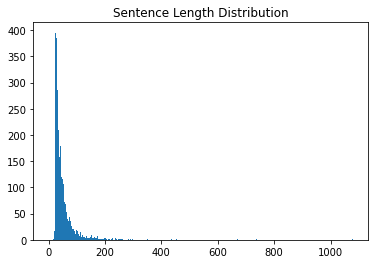

In [92]:
# 데이터 길이 분포 확인하기
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in train_data['review']:
    length = len(sen)
    
    # 문장 최소 길이 찾기
    if min_len > length: 
        min_len = length
    
    # 문장 최대 길이 찾기
    if max_len < length: 
        max_len = length
        
    # 전체 문장을 합치면 길이가 얼마나 될까요?
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(train_data))

# 전체 길이만큼 0벡터
sentence_length = np.zeros((max_len), dtype=np.int)
print("sentence_length : ",sentence_length)

print("="*60)

for sen in train_data['review']:
    sentence_length[len(sen)-1] += 1 # 0으로 이루어진 벡터에 문장 count를 더한 뒤 넣는다.

plt.bar(range(max_len), sentence_length, width=1.0) # 너비는 1.0씩 늘어나도록 설정
plt.title("Sentence Length Distribution")
plt.show()

In [93]:
# 길이 100이하로 한정해 데이터를 만듭니다. ==> 너무 짧은 리뷰는 의미가 없음

train_list = [s for s in train_data['review'] if (len(s) <= 100)]
test_list = [s for s in test_data['review'] if (len(s) <= 100)]

train_list = list(set(train_list))
test_list = list(set(test_list))

train_df = pd.DataFrame(train_list)
test_df = pd.DataFrame(test_list)

In [94]:
# 길이 100이하인 데이터를 기존 데이터와 병합합니다.

new_train_df = pd.merge(train_data, train_df, how='inner', left_on='review', right_on=0)
new_test_df = pd.merge(test_data, test_df, how='inner', left_on='review', right_on=0)

train_data = new_train_df[['category',	'review_type',	'rating',	'review',	'consumer_sex']]
test_data = new_test_df[['category',	'review_type',	'rating',	'review',	'consumer_sex']]

In [95]:
display(train_data.head())
display(test_data.head())

print("훈련데이터 : ",len(train_data))
print("테스트데이터 : ",len(test_data))

,category,review_type,rating,review,consumer_sex
0,아우터,1,4.8,너무예쁨ㅠㅠ 지금 입기 딱 좋아욤 근데 팔이 좀 길어여,남성
1,상의,0,4.9,상체발달형 체형이라 너무 부해보일까봐 스몰사이즈 주문했는데 ㅎㅎ 만족합니다 소재가 ...,남성
2,아우터,1,4.8,굿 체감상 기장이 보다 긴 것 같지만 기분 탓이겠죠 근데 좋아요 가을 오면 자주 입을 듯,남성
3,상의,1,4.8,디자인도 예쁘고 박시한 느낌이라 올 여름 편안하게 입을 것 같습니다,여성
4,아우터,1,4.9,얇고 바스락거리는소재에 화면과같아요 엄브로색조합은 언제나 짱입니다ㅎ,남성


,category,review_type,rating,review,consumer_sex
0,아우터,1,4.7,가볍게 걸치기에 좋습니다 라운드 티 제품들에 비해서는 길이는 적당합니다 박시하게 입...,여성
1,아우터,1,5.0,생각한 거보다 예뻐요 봄 가을에 애용하겠습니다,남성
2,아우터,0,5.0,아부지 선물해드렸는데 좋아하시네요사이즈도 적당하니 좋은거 같아요,남성
3,상의,0,4.7,여름옷 미리 산건데 옷이 가격대비 튼튼하고 괜찮네요 딱 스탠다드에요,남성
4,상의,1,4.7,남자 남편이랑 같이 입어요 많이 입어서 색바램이 조금 있지만그래서 빈티지해진거같...,남성


훈련데이터 :  8374
테스트데이터 :  3879


In [101]:
from konlpy.tag import Okt
# okt 사용
okt = Okt()

# 토큰화, 불용어 제거하여 X_train에 저장
X_train = []
for sentence in train_data['review']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [102]:
# 테스트데이터에도 동일한 과정 진행
X_test = []
for sentence in test_data['review']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [103]:
# 훈련 데이터에 대해서 단어 집합(vocaburary) 형성
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # 단어집합 형성 메서드 : fit_on_texts()

In [104]:
# 등장 빈도수가 3회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items(): # items : 단어와 빈도수를 출력
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5936
등장 빈도가 2번 이하인 희귀 단어의 수: 3486
단어 집합에서 희귀 단어의 비율: 58.72641509433962
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.958184001563911


In [105]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2451


In [106]:
# vocab 사이즈로 토크나이저
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [107]:
# 타겟데이터 분리
y_train = np.array(train_data['review_type'])
y_test = np.array(test_data['review_type'])

In [108]:
# 빈 샘플들은 어떤 레이블이 붙어있던 의미가 없으므로 빈 샘플들을 제거해주는 작업
# 단어 길이가 0인 것들을 drop
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [109]:
# 빈 샘플들을 제거한 후의 샘플 갯수 확인
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

8373
8373


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [110]:
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [112]:
# 길이 30 이하의 리뷰가 몇 %인지 확인
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 99.66559178311239


In [113]:
# 모든 샘플의 길이를 30으로 설정
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [114]:
# 모델 선언
# 임베딩 벡터의 차원은 100, LSTM을 사용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(vocab_size, 100)) # 임베딩 레이어
model.add(LSTM(128)) # LSTM 레이어
model.add(Dense(1, activation='sigmoid')) # 출력 레이어

In [116]:
# Early Stopping과 CheckPoint 사용하여 과적합 방지
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# 모델 하이퍼 파라미터 설정
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
112/112 [==============================] - ETA: 0s - loss: 0.5360 - acc: 0.7228
Epoch 1: val_acc improved from -inf to 0.57731, saving model to best_model.h5
112/112 [==============================] - 18s 123ms/step - loss: 0.5360 - acc: 0.7228 - val_loss: 0.7135 - val_acc: 0.5773
Epoch 2/15
112/112 [==============================] - ETA: 0s - loss: 0.4982 - acc: 0.7513
Epoch 2: val_acc did not improve from 0.57731
112/112 [==============================] - 10s 91ms/step - loss: 0.4982 - acc: 0.7513 - val_loss: 0.7502 - val_acc: 0.5749
Epoch 3/15
112/112 [==============================] - ETA: 0s - loss: 0.4625 - acc: 0.7711
Epoch 3: val_acc did not improve from 0.57731
112/112 [==============================] - 12s 106ms/step - loss: 0.4625 - acc: 0.7711 - val_loss: 0.7997 - val_acc: 0.5690
Epoch 4/15
112/112 [==============================] - ETA: 0s - loss: 0.4239 - acc: 0.7923
Epoch 4: val_acc did not improve from 0.57731
112/112 [==============================] - 9s 84m

In [117]:
result = model.evaluate(X_test,  y_test, verbose=2)
print(result)

122/122 - 2s - loss: 0.9284 - acc: 0.5782 - 2s/epoch - 17ms/step
[0.9283970594406128, 0.5782418251037598]


In [118]:
# 가장 좋았던 모델 불러오기
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

122/122 [==============================] - 3s 19ms/step - loss: 0.7071 - acc: 0.5981

 테스트 정확도: 0.5981


In [122]:
def step1_data_preprocessing():
  text_list = df['review'].tolist()
  star_list = df['review_type'].tolist()

  text_train, text_test, star_train, star_test = train_test_split(text_list, star_list, test_size=0.2, random_state=42)

  return text_train, text_test, star_train, star_test

In [129]:
def tokenizer(text):
  okt = Okt()
  return okt.morphs(text)

In [133]:
from sklearn.linear_model import LogisticRegression
import pickle

def step2_learning(X_train, y_train, X_test, y_test):
  tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer)

  logistic = LogisticRegression(C=10, penalty='l2', random_state=42)

  pipe = Pipeline([('vect', tfidf), ('clf', logistic)])

  pipe.fit(X_train, y_train)
  
  y_pred = pipe.predict(X_test)
  print(accuracy_score(y_test, y_pred))

  with open('pipe.dat', 'wb') as fp:
    pickle.dump(pipe, fp)
  print('저장완료')

In [134]:
def using_model():
  with open('pipe.dat', 'rb') as fp:
    pipe = pickle.load(fp)

  while True :
    text = input('리뷰를 작성해주세요 :')

    str = [text]
    # 예측 정확도
    r1 = np.max(pipe.predict_proba(str)*100)

    # 예측 결과
    r2 = pipe.predict(str)[0]

    if r2 == '1':
      print('긍정적인 리뷰')
    else:
      print('부정적인 리뷰')
    
    print('정확도 : %.3f' % r1)

# 학습 함수
def learning():
  text_train, text_test, star_train, star_test = step1_data_preprocessing()
  step2_learning(text_train, star_train, text_test, star_test)

# 사용 함수
def using():
  using_model()

In [135]:
learning()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6054015296367112
저장완료


In [ ]:
using()

리뷰를 작성해주세요 :핏 좋아요
부정적인 리뷰
정확도 : 72.782
리뷰를 작성해주세요 :별로
부정적인 리뷰
정확도 : 96.321
리뷰를 작성해주세요 :얇아요
부정적인 리뷰
정확도 : 56.164
리뷰를 작성해주세요 :좋아요
부정적인 리뷰
정확도 : 56.061
